In [17]:
!pip install opencv-python tensorflow keras numpy matplotlib deepface mtcnn


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
from mtcnn import MTCNN


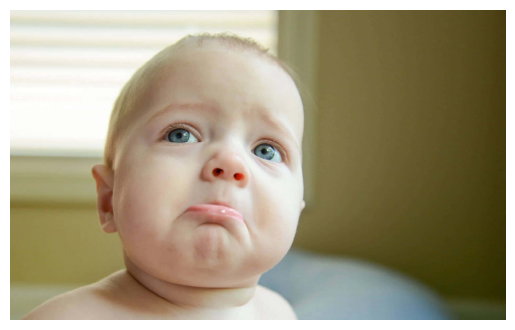

In [28]:
# Load the image
image_path = "/content/sample_data/pic3.jpg"  # Provide the image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


In [29]:
# Initialize MTCNN detector
detector = MTCNN()

# Detect faces
faces = detector.detect_faces(image_rgb)

if len(faces) > 0:
    print("✅ Human face detected!")
    for face in faces:
        x, y, width, height = face["box"]
        confidence = face["confidence"]
        print(f"Face detected with confidence: {confidence:.2f}")

        # Draw bounding box
        cv2.rectangle(image_rgb, (x, y), (x + width, y + height), (0, 255, 0), 3)
else:
    print("❌ No human face detected.")


✅ Human face detected!
Face detected with confidence: 1.00


In [30]:
from deepface import DeepFace

# Path to your image
image_path = "/content/sample_data/pic3.jpg"  # Change this to your actual image path

# Analyze image with DeepFace
result = DeepFace.analyze(image_path, actions=["age", "gender", "emotion"],enforce_detection=True, detector_backend="mtcnn")

# Extract details safely
age = result[0].get('age', "N/A")
gender = result[0].get('gender', "Unknown")
emotion = result[0].get('dominant_emotion', "Unknown")

# Classify as kid or adult
category = "Kid" if isinstance(age, int) and age < 18 else "Adult"

# Print results
print(f"👤 Gender: {gender}")
print(f"📅 Age: {age} ({category})")
print(f"😊 Emotion: {emotion}")


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

👤 Gender: {'Woman': 11.01180836558342, 'Man': 88.98819088935852}
📅 Age: 29 (Adult)
😊 Emotion: neutral


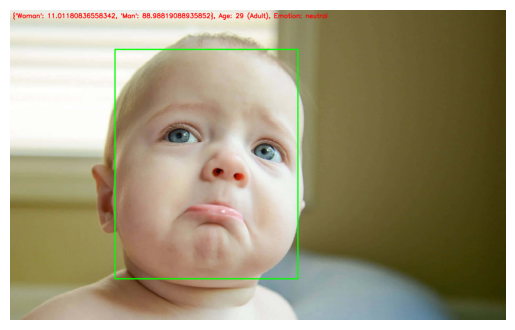

In [31]:
# Annotate results on the image
text = f"{gender}, Age: {age} ({category}), Emotion: {emotion}"
cv2.putText(image_rgb, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Display the final annotated image
plt.imshow(image_rgb)
plt.axis("off")
plt.show()
